# An Introduction to Ethical Supervised Learning - Solution Manual

<hr/>

## Overview:
- Measuring performance of supervised learning predictors that are:
    - classification problems
    - binary predictors
- Introduction to non-discriminatory ML predictor models
- Charting performance of a TransRisk score case study to determine if it passes as non-discriminatory

<hr/>

## Part 1: A Brief Introduction to Non-Discriminatory Machine Learning Predictors
For companies that use classification based predictors, sometimes the predicted outcome of individuals within a group will fully influence the decision that is made for that individual. This needs to be treated particularly carefully when the decision being made is an <i>Important Benefit</i> - ie) health care, loan approval, or college admission. What if the data that is being used to train the model is inherently discriminatory? What if factors that created the data we use was inherently discriminatory and we didn't even know? Then the outcome predicted would also be discriminatory.<br/><br/>
This is what non-discriminatory predictors seek to solve. For example, <b>The Equal Opportunity Model</b> requires that the true positive rate for all groups in a dataset to be the same in order to achieve fairness. What does this mean in terms of performance for binary classifiers? (Write in terms of 1's an 0's below)

** Write Answer Here: **

Among all of the actual 1's, it's the percentage you predicted were 1.

<hr/>

## Part 2: Introducing the TransRisk Dataset
For this part of the tutorial, we will be working with a dataset that represents the distribution of TransRisk scores for non-defaulters (the 'Good' - people who have previously paid off their loans on time) and defaulters (the 'Bad' - people who previously haven't paid their loans on time) against four main demographic groups: Asian, Hispanic, Black, and White. Go ahead and import this data to take a look. What collected information to create TransRisk scores could be inherently discriminatory?

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
totalData = pd.read_csv("TransRiskScores.csv")
totalData.head()

,TransRisk Score,Demographic,Good,Bad
0,0.0,white,0.000000,1.000000
1,0.5,white,0.000000,1.000000
2,1.0,white,0.025629,0.974371
3,1.5,white,0.027318,0.972682
4,2.0,white,0.042152,0.957848


For loan approval, usually a bank will set a <b>threshold TransRisk score</b> that determines who is approved and who is denied. For example, if the threshold was 60: everyone with a TransRisk score below 60 would be denied the loan, and everyone with a TransRisk score above 60 would be approved a loan.
<br/><br/>
How should a predictor go about deciding who should get a loan and who should not? It makes sense to say all of the people who <i>deserve</i> a loan should receive one. In the case of the TransRisk score, the group of people who <i>deserve</i> a loan would be the non-defaulters. 
<br/><br/>
Following this logic, in theory the probability of a non-defaulter getting a loan ($\hat Y$ = 1) at any threshold TransRisk score should be the same amongst all four groups. Finish the function below to plot the distribution of non-defaulters from one group getting ($\hat Y$ = 1) based on a threshold value of TransRisk scores. Then, get the probabilities for all four demographic groups and plot them on top of eachother.

### Explanation of Multiplication Rule (still working on this)
- The intersection between two events is the probability that both occur
- The conditional probability of B given A is P(B | A)
- The chance that two things (A and B) happen is:
    - P(A and B) = P(A) * P(B | A)
- Note that this probability is smaller than the chance that just one of them happens because there is a less likely probability that both will happen than just one. (Also denoted as A and B is a subset of B)
- Using this theory, we apply it to find the probability of a demographic receiving a loan.
- A = P(score = x | race) --> this is shown in Figure 3A
- B = P(good | score = x, race) --> this is shown in the totalData csv
- A * B = P(good and score = x | race) 
- We want to know P(good and score >= x | race) to know the likelihood of someone getting a loan based off of a threshold that awards loans to people with a score of x or higher.



In [30]:
# A represents P(score = x | race)
# B represents P(good | score = x and race)
# AMultB represents P(good and score = x | race)
# ProbOfGettingALoan represents P(good and score >= x | race) -- this is the part that is wrong currently
A = pd.read_csv("figure3A.csv").set_index(["Score"])
B = pd.read_csv("TransRiskScores.csv").set_index(["TransRisk Score", "Demographic"]).unstack()["Good"]

In [55]:
AMultB = pd.DataFrame(A.values*B.values, columns=B.columns, index=B.index)
ProbOfGettingALoan = AMultB.cumsum()

** Plot Graph Below **

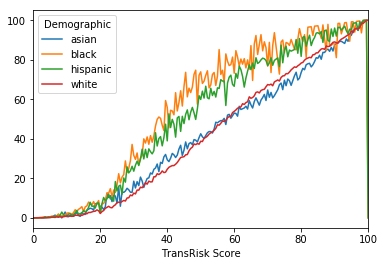

In [57]:
AMultB.plot.line()

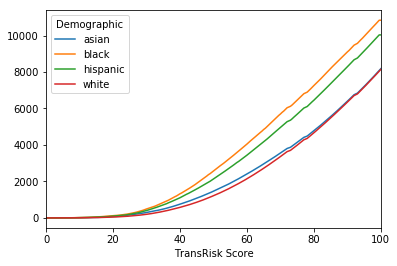

In [56]:
ProbOfGettingALoan.plot.line()

<hr/>

## Part 3:  Calculating Performance
Now that we've seen the likelihood of non-defaulting individuals from each of the four demographic groups to be approved a loan based on threshold value, let's check the performance of this model. Take a look at the original data again. This part will be easier if you can separate the data into four different dataframes, one for each demographic. <i>Note: it is also helpful if you set the index to be the TransRisk score.</i>

In [42]:
whites = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "white"]
asians = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "asian"]
blacks = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "black"]
hispanics = totalData[["TransRisk Score", "Demographic", "Good", "Bad"]][totalData["Demographic"] == "hispanic"]

In [43]:
whites.set_index("TransRisk Score", inplace=True)
asians.set_index("TransRisk Score", inplace=True)
blacks.set_index("TransRisk Score", inplace=True)
hispanics.set_index("TransRisk Score", inplace=True)

** Complete : Calculate the following problem for both the White and Black demographic groups with a threshold TransRisk score of 60**

For all of the individuals that <i>deserve</i> a loan, how many will receive one?

In [44]:
totalGood = whites["Good"].sum()
tp = whites["Good"].loc[60:].sum()
white_sensitivity = tp / totalGood
totalGood = blacks["Good"].sum()
tp = blacks["Good"].loc[60:].sum()
black_sensitivity = tp / totalGood
white_sensitivity, black_sensitivity

(0.5396992468702396, 0.5830592912467721)

<hr/>

### Analysis: 

What you just calculated is the <b>sensitivity</b> of the White and Black demographic groups for a single threshold value (60). If you recall from the beginning of this tutorial, for the Equalized Opportunity fairness model the main requirement for achieving fairness is to ensure that the true positive rates (also known as the sensitivity) are the same for all groups. As we saw in our plot from Part 2, Equalized Opportunity was definitely not being satisfied. So, how might we go about finding an easy solution to this problem? The answer lies in utilizing this performance metric. To satisfy the requirement, we need to find a point where all demographic groups have the same sensitivity and the same defaulting rate. <br/><br/>
It makes sense that sensitivity must be the same for all demographic groups (since that is what we are trying to accomplish with the <b>Equalized Opportunity Model</b>). But why do we need to have the same defaulting rate? This is because there is going to be a separate sensitivity value for each threshold we choose. It would be easy to choose a threshold score that gives us a sensitivity of 1 (the ideal sensitivity), but then what if choosing that score creates an unfair percentage of defaulters who are allowed loans for one demographic over another? That is why it is important to make sure that the percentage of defaulters is about the same for each demographic group as well, to ensure fairness.<br/><br/>
*** How do you choose which percent default is the best? *** <br/><br/>
This question depends on the company that is giving out the loans. Many banks will stick to an 18% loss function. Meaning that for all of the loans they give out, there's an 18% chance that the people granted a loan will default. Based on this example, you will try to find four different threshold scores (one for each demographic) that provide the same sensitivity for all, and the same 18% probability of defaulting for all.


<hr/>

### Step 1: Visualize the Sensitivity 
<i>Create a plot representing the sensitivity and TransRisk scores to visualize the sensitivity versus the threshold score for all demographic groups</i>

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def getSensitivityDF(demographic, data):
    scores = []
    percent_default = []
    totalGood = data["Good"].sum()    
    sensitivity = []
    for index, row in data.iterrows():
        currTP = data["Good"].loc[index:].sum()
        sensitivity.append(currTP / totalGood)
        scores.append(index)
        percent_default.append(1 - (currTP / totalGood))
    df = pd.DataFrame({ 'Score' : scores,
    'Demographic' : np.full(len(scores), demographic),
    'Sensitivity' : sensitivity,
    'Percent_Default': percent_default})
    return df

In [52]:
white_sensitivity = getSensitivityDF("white", whites)
asian_sensitivity = getSensitivityDF("asian", asians)
black_sensitivity = getSensitivityDF("black", blacks)
hispanic_sensitivity = getSensitivityDF("hispanic", hispanics)

In [53]:
sensitivities = pd.concat([white_sensitivity, 
          asian_sensitivity, 
          black_sensitivity, 
          hispanic_sensitivity], axis=0)

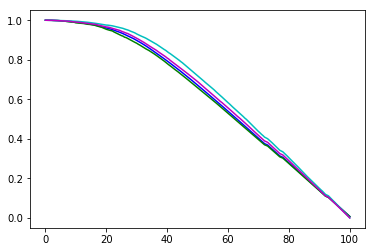

In [54]:
plt.plot(white_sensitivity["Score"], white_sensitivity["Sensitivity"],  'b-')
plt.plot(asian_sensitivity["Score"], asian_sensitivity["Sensitivity"],  'g-')
plt.plot(black_sensitivity["Score"], black_sensitivity["Sensitivity"],  'c-')
plt.plot(hispanic_sensitivity["Score"], hispanic_sensitivity["Sensitivity"],  'm-')

<hr/>

###  Step 2: Utilize 18% Loss 
<i>Now that you have all of your sensitivity for each demographic, find the percent default for every calculation of sensitivity. </i> <br/><br/>
*** Important Notes: ***
- The sensitivity should be cumulative (because a threshold score means everyone at a score and above will recieve the loan)
- The percent_default should also be cumulative
- Is there an easy way to calculate percent default based off the calculations you've already made?

In [ ]:
## Solution notes:
## The cumulative percent default is just 1 - sensitivity
## Which means a percent default of 18% is a sensitivity value of ~ 82%
## So, find the sensitivity of ~ 82% for each demographic, and the score at that sensitivity
## is the score you should choose!
## Below, we calculate what the scores look like closest to 18% default for each demographic for visual clarity.

In [ ]:
min_white = min(
    white_sensitivity["Percent_Default"], key=lambda x:abs(x-0.18)
)
white_final = white_sensitivity[white_sensitivity["Percent_Default"] == min_white]
white_final

In [ ]:
min_asian = min(
    asian_sensitivity["Percent_Default"], key=lambda x:abs(x-0.18)
)
asian_final = asian_sensitivity[asian_sensitivity["Percent_Default"] == min_asian]
asian_final

In [ ]:
min_black = min(
    black_sensitivity["Percent_Default"], key=lambda x:abs(x-0.18)
)
black_final = black_sensitivity[black_sensitivity["Percent_Default"] == min_black]
black_final

In [ ]:
min_hispanic = min(
    hispanic_sensitivity["Percent_Default"], key=lambda x:abs(x-0.18)
)
hispanic_final = hispanic_sensitivity[hispanic_sensitivity["Percent_Default"] == min_hispanic]
hispanic_final

<hr/>

###  Step 3: Find the final 'fair' scores for each demographic
<i>Now that we have found scores for each demographic that have the same percent default of 18% and the same sensitivity, write them below. These are the four threshold values that you would need to use to determine loan approval with this dataset in order to satisfy the <b>Equal Opportunity Model.</b></i> <br/><br/>

*** Write Scores Here: ***

In [ ]:
white_final.Score, asian_final.Score, black_final.Score, hispanic_final.Score

<hr/>
## Conclusion

Congratulations! You have successfully taken a discriminatory set of data and utilized a machine learning fairness model to make it into a fair predictor. As our research showed, it was very obvious that the data involved in creating the supervised learning predictors for loan approval from TransRisk scores was inherently discriminatory.<br/><br/> What are some other possible solutions for optimizing performance of these models to ensure non-discriminatory decision making? 
<br/><br/>
TransRisk data and non-discriminatory analysis courtesy of https://arxiv.org/pdf/1610.02413.pdf